<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/Skenario4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sklearn

In [3]:
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/data%20fix.csv' 
dataframe = pd.read_csv(URL)
dataframe

,Period,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,Jan-10,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,Feb-10,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,Mar-10,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,Apr-10,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,May-10,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Aug-18,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,Sep-18,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,Oct-18,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,Nov-18,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [5]:
# mengambil kolom RF, PD, OS dan mengacak dataset
data = dataframe[['RF', 'PD', 'OS']]
data = shuffle(data)
data.head()

,RF,PD,OS
87,15.99,839.40,0
82,6.49,837.22,1
107,10.41,847.84,1
47,14.57,819.82,0
41,4.84,816.71,0


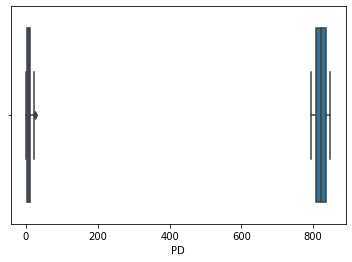

In [26]:
import seaborn as sns

#melihat outlier
sns.boxplot(x=data['RF'])
sns.boxplot(x=data['PD'])

#RF tidak begitu jauh outliernya

In [6]:
#train-test split 80-20
train, test = train_test_split(data, test_size=0.2)
print(len(train), 'banyak data train')
print(len(test), 'banyak data test')

#train-test split 70-30
train1, test1 = train_test_split(data, test_size=0.3)
print(len(train1), 'banyak data train')
print(len(test1), 'banyak data test')

86 banyak data train
22 banyak data test
75 banyak data train
33 banyak data test


In [7]:
#pisahkan label
def df_to_dataset(data, batch_size=32):
  data = data.copy()
  labels = data.pop('OS')
  ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
  ds = ds.batch(batch_size)
  return ds

In [8]:
batch_size = 20 # A small batch sized is used for demonstration purposes
#80-20 split
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

#70-30 split
train_ds1 = df_to_dataset(train1, batch_size=batch_size)
test_ds1 = df_to_dataset(test1, batch_size=batch_size)

In [9]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('RF:', feature_batch['RF'])
  print('PD:', feature_batch['PD'])
  print('OS:', label_batch)

Every feature: ['RF', 'PD']
RF: tf.Tensor(
[ 9.2         3.67        4.84        6.5         0.         12.77
 11.88        5.15       11.81        1.1        17.53       11.03
  5.32        0.73       15.73       16.65        0.48        9.
  9.80285714 16.17      ], shape=(20,), dtype=float64)
PD: tf.Tensor(
[819.3  845.35 816.71 800.56 830.72 827.54 832.31 816.19 836.77 810.05
 798.79 821.86 824.93 802.93 838.53 827.01 810.64 842.87 821.35 834.98], shape=(20,), dtype=float64)
OS: tf.Tensor([0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1], shape=(20,), dtype=int64)


In [10]:
feature_columns = []

for header in ['RF', 'PD']:
  feature_columns.append(feature_column.numeric_column(header))

In [11]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer

In [16]:
model = tf.keras.Sequential([
  feature_layer,
  #layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  #layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                validation_data=test_ds,
                epochs=75)

Epoch 1/75
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/5 [=====>........................] - ETA: 1s - loss: 6.5311 - accuracy: 0.2500WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'RF': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'PD': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>}
Consider rewriting this model with the Functional API.
5/5 [==============================] - 1s 34ms/step - loss: 3.0752 - accuracy: 0.6163 - val_loss: 2.6720 - val_accuracy: 0.7273
Epoch 2/75
5/5 [==============================] - 0s 6ms/step - loss: 1.7034 - accuracy: 0.6860 - val_loss: 1.8607 - val_accuracy: 0.2727
Epoch 3/75
5/5 [==============================] - 0s 6ms/step - loss: 1.2131 - accuracy: 0.5233 - val_loss: 1.4500 - val_accuracy: 0.7273
Epoch 4/75
5/5 [==============================] - 0s 7ms/step - loss: 1.0844 - acc

In [21]:
history2 = model.fit(train_ds1,
                validation_data=test_ds1,
                epochs=75)

Epoch 1/75
4/4 [==============================] - 0s 9ms/step - loss: 0.6124 - accuracy: 0.6933 - val_loss: 0.5556 - val_accuracy: 0.7273
Epoch 2/75
4/4 [==============================] - 0s 8ms/step - loss: 0.6191 - accuracy: 0.6533 - val_loss: 0.5824 - val_accuracy: 0.7576
Epoch 3/75
4/4 [==============================] - 0s 8ms/step - loss: 0.6187 - accuracy: 0.6933 - val_loss: 0.5607 - val_accuracy: 0.7576
Epoch 4/75
4/4 [==============================] - 0s 8ms/step - loss: 0.6033 - accuracy: 0.7333 - val_loss: 0.5557 - val_accuracy: 0.7273
Epoch 5/75
4/4 [==============================] - 0s 9ms/step - loss: 0.5953 - accuracy: 0.7200 - val_loss: 0.5545 - val_accuracy: 0.7576
Epoch 6/75
4/4 [==============================] - 0s 7ms/step - loss: 0.5962 - accuracy: 0.7067 - val_loss: 0.5661 - val_accuracy: 0.7273
Epoch 7/75
4/4 [==============================] - 0s 7ms/step - loss: 0.5970 - accuracy: 0.7333 - val_loss: 0.5624 - val_accuracy: 0.7273
Epoch 8/75
4/4 [==================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


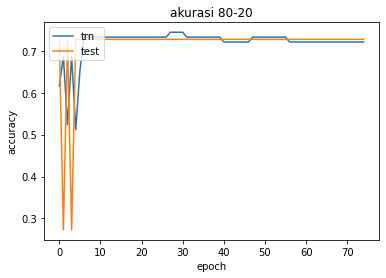

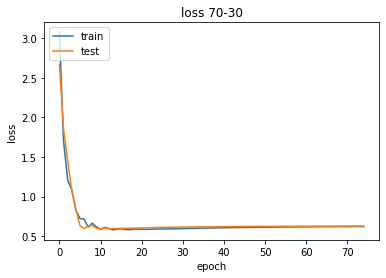

In [18]:
import matplotlib.pyplot as plt

print(history.history.keys())
#history 80-20
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss 70-30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

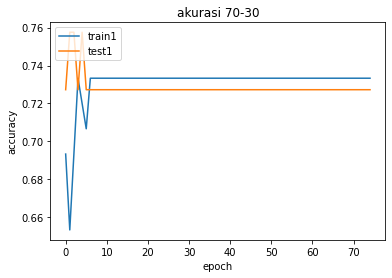

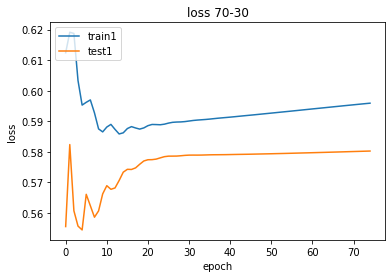

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('akurasi 70-30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1', 'test1'], loc='upper left')
plt.show()
#loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss 70-30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'test1'], loc='upper left')
plt.show()